In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix


In [24]:
fraud_transactions = pd.read_csv('./datasets/creditcard-modified.csv',index_col=0)
fraud_transactions.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
91771,63621.0,-0.960137,1.206609,2.026405,-0.628816,0.201602,-0.898113,1.100185,-0.354583,-0.225842,...,-0.271188,-0.705533,-0.212958,0.364038,0.234168,-0.027049,-0.208287,-0.102126,2.69,0
205605,135832.0,2.031877,-0.097557,-1.209013,0.435114,-0.009684,-1.092250,0.281522,-0.371851,0.504616,...,-0.239962,-0.534819,0.240245,-0.078971,-0.162834,0.279192,-0.073682,-0.059863,24.01,0
246685,153282.0,2.051962,0.628752,-2.342524,1.437871,1.164495,-0.873292,0.734087,-0.386544,-0.031124,...,-0.038181,0.167084,-0.012515,0.508870,0.535805,-0.517944,0.007064,-0.022177,1.00,0
212610,138926.0,0.089688,0.264593,-0.328242,-2.416836,0.537514,-0.950072,0.676234,-0.272587,-1.151421,...,0.544267,1.640856,-0.123822,0.646009,-0.629648,-0.234901,0.455501,0.311445,15.00,0
82999,59646.0,1.274163,0.414063,-0.033853,0.920460,0.266021,-0.450671,0.335275,-0.280055,-0.213540,...,0.001111,0.101484,-0.236981,-0.409455,0.849685,-0.283042,0.020660,0.018032,20.00,0
27890,34754.0,1.391007,-1.469809,1.168768,-1.134833,-2.088535,0.077296,-1.733541,0.245543,-0.810584,...,-0.226671,-0.138953,0.106559,0.034314,0.121243,-0.161810,0.084089,0.027576,22.00,0
209075,137403.0,2.151015,-0.070477,-2.571981,-0.338708,1.002019,-0.596894,0.500956,-0.201453,0.256297,...,0.125406,0.366472,-0.085471,-0.105760,0.458337,0.247256,-0.103831,-0.094871,0.75,0
150566,93675.0,-1.087730,1.549232,0.165606,-0.979235,1.204379,0.902956,-0.467572,-2.592983,0.683055,...,-1.513069,-0.040886,-0.240288,-0.343415,0.806495,0.019315,-0.250360,-0.019673,13.00,0
246383,153152.0,1.841520,-0.753772,0.040719,0.995352,-1.228052,0.053056,-1.177330,0.253539,2.366046,...,-0.187204,-0.077837,0.207633,-0.070350,-0.440856,0.571945,0.030094,-0.008738,41.87,0
140447,83729.0,-0.126631,-0.183058,-2.490716,-2.302333,0.197675,3.040177,-2.378229,1.996806,-2.384884,...,-0.011055,-0.188586,0.489661,0.966362,-0.770721,-0.331808,-0.596116,-0.390682,10.00,0


In [25]:
from sklearn.preprocessing import StandardScaler
fraud_transactions['Amount_Scaled'] = StandardScaler().fit_transform(fraud_transactions['Amount'].values.reshape(-1,1))
fraud_transactions = fraud_transactions.drop(['Amount'],axis=1)
fraud_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
91771,63621.0,-0.960137,1.206609,2.026405,-0.628816,0.201602,-0.898113,1.100185,-0.354583,-0.225842,...,-0.271188,-0.705533,-0.212958,0.364038,0.234168,-0.027049,-0.208287,-0.102126,0,-0.348905
205605,135832.0,2.031877,-0.097557,-1.209013,0.435114,-0.009684,-1.092250,0.281522,-0.371851,0.504616,...,-0.239962,-0.534819,0.240245,-0.078971,-0.162834,0.279192,-0.073682,-0.059863,0,-0.262528
246685,153282.0,2.051962,0.628752,-2.342524,1.437871,1.164495,-0.873292,0.734087,-0.386544,-0.031124,...,-0.038181,0.167084,-0.012515,0.508870,0.535805,-0.517944,0.007064,-0.022177,0,-0.355752
212610,138926.0,0.089688,0.264593,-0.328242,-2.416836,0.537514,-0.950072,0.676234,-0.272587,-1.151421,...,0.544267,1.640856,-0.123822,0.646009,-0.629648,-0.234901,0.455501,0.311445,0,-0.299032
82999,59646.0,1.274163,0.414063,-0.033853,0.920460,0.266021,-0.450671,0.335275,-0.280055,-0.213540,...,0.001111,0.101484,-0.236981,-0.409455,0.849685,-0.283042,0.020660,0.018032,0,-0.278774


In [26]:
X = fraud_transactions.drop('Class', axis=1)
y = fraud_transactions['Class']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [28]:
y_train.value_counts()


0    41656
1      344
Name: Class, dtype: int64

In [29]:
y_test.value_counts()

0    17852
1      148
Name: Class, dtype: int64

In [30]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
53545,46033.0,-0.093815,-0.054224,1.200260,-1.435211,-0.549693,-0.244441,0.044555,0.023849,-1.010845,...,0.189074,0.128804,0.110763,-0.104478,-0.613307,0.038312,-0.260330,0.015100,0.017628,-0.126843
134602,80880.0,0.747826,-0.997434,1.005095,0.222394,-0.711655,1.494682,-0.829095,0.616102,1.201171,...,0.020102,-0.017038,0.047652,0.136171,-0.564585,-0.281898,1.038232,0.011225,0.024971,0.206270
156162,107451.0,2.055459,-0.091205,-0.560433,0.284060,0.021659,-0.077111,-0.468988,-0.173858,2.468768,...,-0.160336,-0.312378,-0.445311,0.220417,-1.145085,-0.220619,-0.899911,0.042414,-0.040433,-0.330228
128688,78802.0,1.061468,-0.485974,1.328993,0.334514,-1.515118,-0.736448,-0.574037,-0.027390,0.993413,...,0.067060,-0.041914,-0.051695,0.068151,1.019617,0.031018,0.949131,-0.042637,0.033304,-0.076402
199268,132879.0,2.062067,0.022795,-1.040070,0.408877,-0.058218,-1.194963,0.253771,-0.393106,0.387746,...,-0.159516,-0.276940,-0.614708,0.329014,0.074013,-0.265417,0.191973,-0.064144,-0.057642,-0.351782


In [31]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
104772,69223.0,-1.205869,0.358476,0.941843,-1.283479,-0.691672,-1.064738,0.433261,-0.464115,-0.884868,...,-0.301234,-0.204913,-0.867589,0.322618,0.314084,-0.274638,-0.754106,-0.934648,0.188482,-0.193693
206818,136387.0,1.794759,-0.165381,-1.714265,0.584960,0.036922,-1.271314,0.385374,-0.402575,0.793853,...,0.144972,-0.166805,-0.407017,0.065720,-0.036951,-0.060594,-0.108318,-0.017697,0.005410,0.152466
272985,165359.0,2.070787,-0.226940,-1.528827,0.052052,0.392247,-0.198030,-0.003233,-0.045828,0.483416,...,-0.222363,-0.308175,-0.837945,0.202859,-1.180607,-0.230090,0.253149,-0.079941,-0.082131,-0.319330
193621,130215.0,-2.588604,-0.326426,1.068028,3.657966,2.557784,0.614117,0.495115,-0.038830,-1.521187,...,-0.896853,-0.265302,0.374919,0.518917,-0.040110,1.222879,0.465642,0.039979,-0.021340,-0.316899
48559,43694.0,0.398713,1.724824,-3.794925,0.528056,3.163993,2.335216,0.005451,1.110668,-0.572590,...,0.091470,-0.141771,-0.485937,0.123842,0.653565,-0.286417,-0.395778,-0.001024,-0.058018,-0.352552


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"],"max_depth": list(range(8,10,12))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [33]:
tree_clf

DecisionTreeClassifier(max_depth=8)

In [34]:

y_pred = tree_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9973888888888889


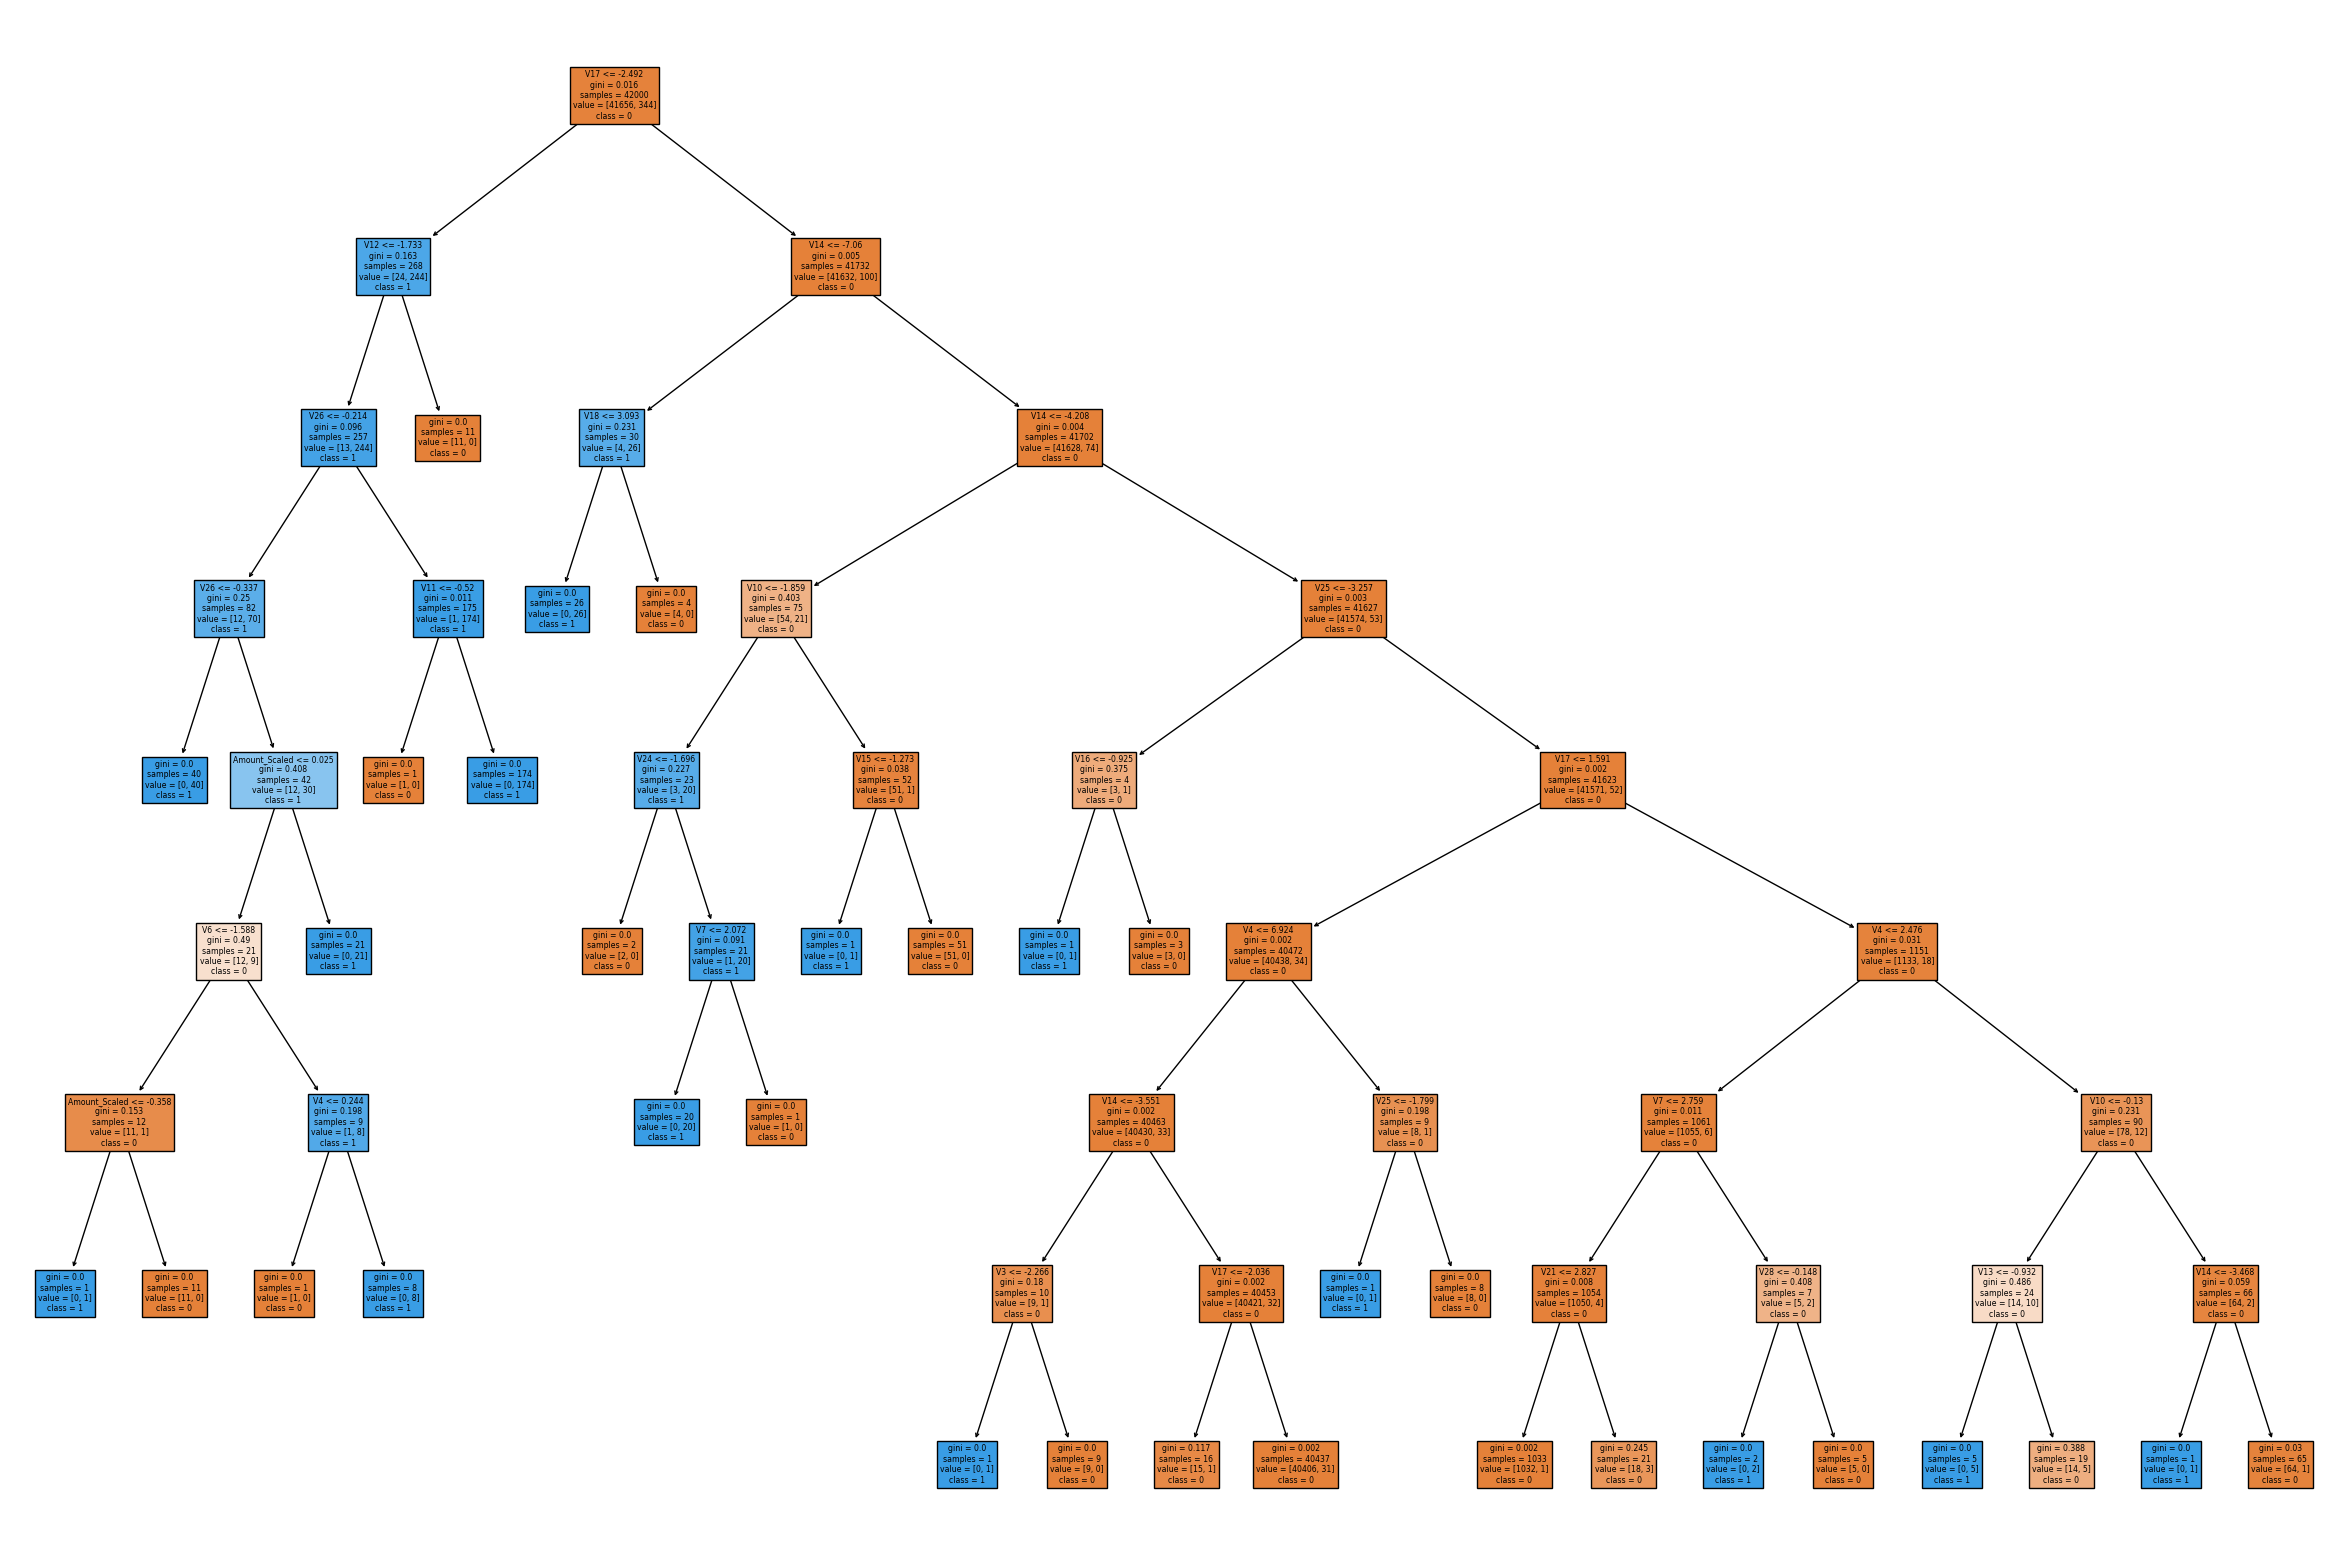

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

In [36]:
fraud_transactions['Class'].value_counts()

0    59508
1      492
Name: Class, dtype: int64

In [37]:
df = fraud_transactions.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
44496,41971.0,-0.342552,1.193489,1.311542,0.054581,0.104088,-0.960848,0.777579,-0.124738,-0.531466,...,-0.252685,-0.615717,-0.022604,0.358666,-0.129821,0.068806,0.251077,0.100312,0,-0.341613
184379,126219.0,-1.141559,1.927650,-3.905356,-0.073943,-0.044858,-1.756999,-1.217416,0.364563,-2.770148,...,0.102081,-0.531496,-0.328741,0.393100,0.568435,0.786605,-0.146102,0.076211,1,-0.258517
226436,144622.0,-0.106889,1.726535,0.705404,4.266459,1.201562,1.511412,0.365990,-0.726626,-1.900681,...,0.901757,0.420148,-0.229998,0.084648,-0.279150,0.500876,0.263430,0.200509,0,-0.329094
6529,7891.0,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1,-0.355752
50211,44393.0,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,-2.457034,...,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1,-0.355752


In [38]:
# Undersampling before cross validating (prone to overfit)
X_under = new_df.drop('Class', axis=1)
y_under = new_df['Class']

In [39]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [40]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"],"max_depth": list(range(6,8,10))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_us, y_train_us)
tree_clf = grid_tree.best_estimator_

In [41]:
tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [42]:

y_pred = tree_clf.predict(X_test_us)

# Compute accuracy
accuracy = accuracy_score(y_test_us, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9086294416243654


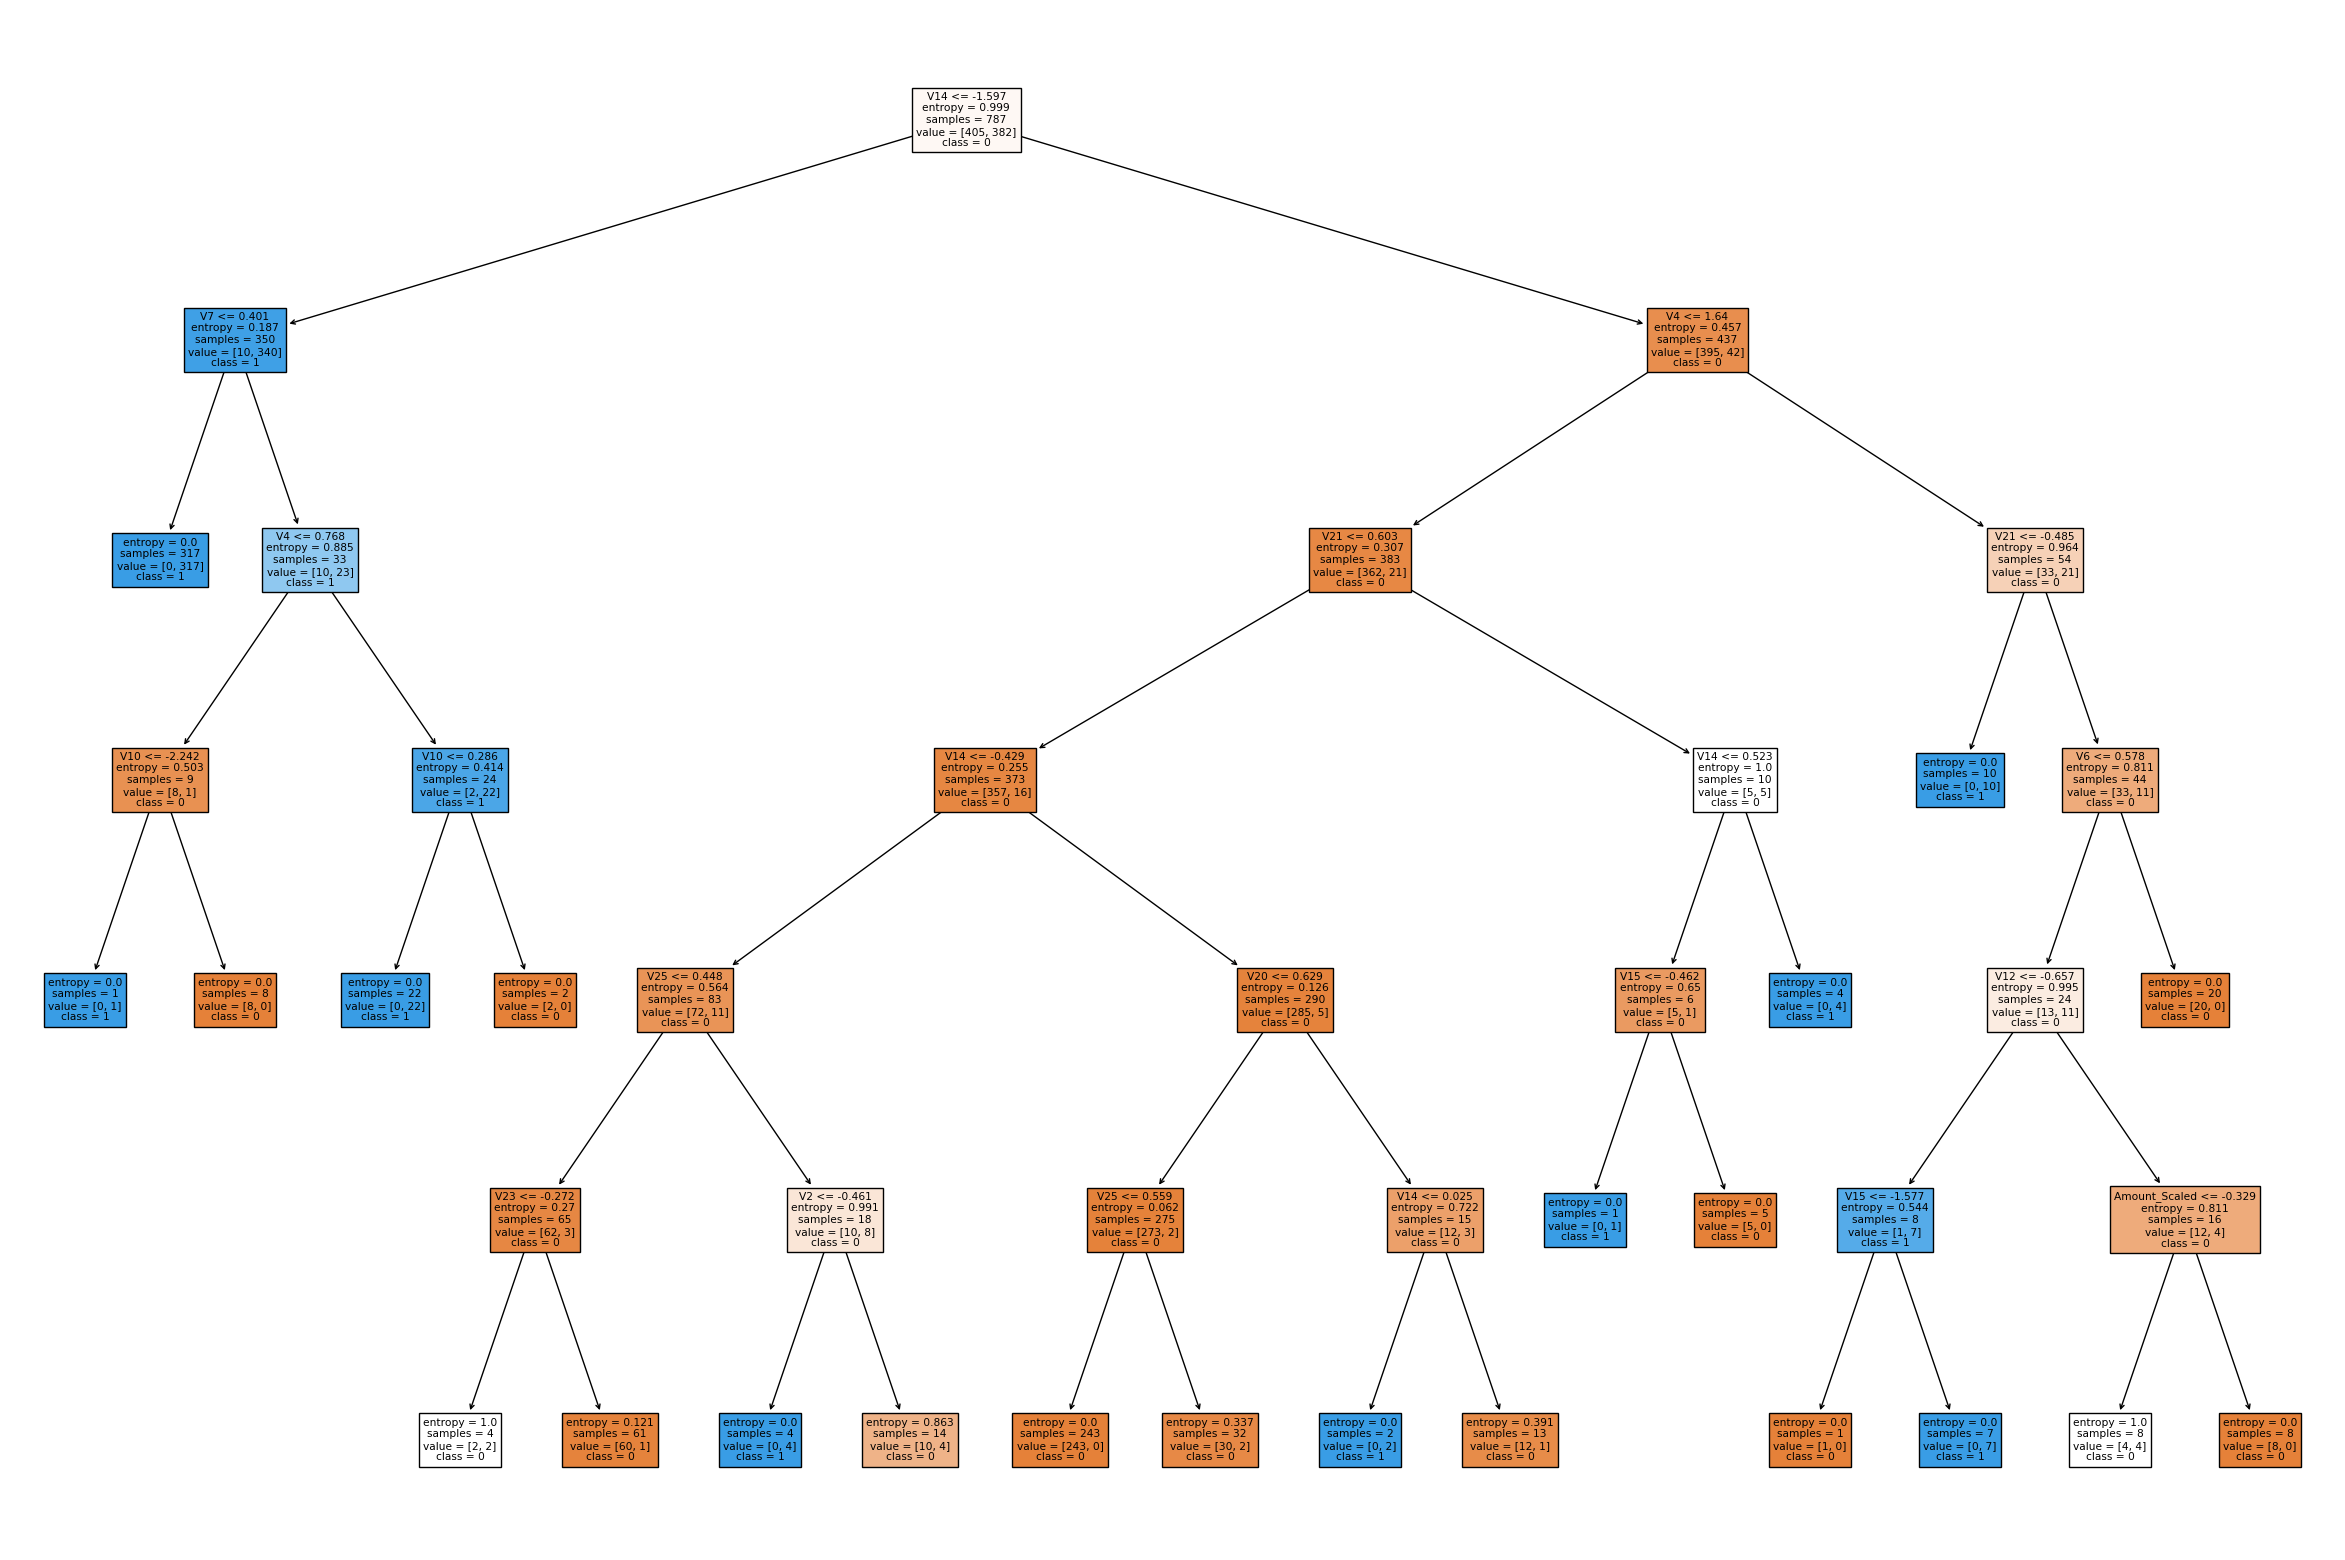

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

In [44]:
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [47]:
drop_list = ['V8','V1','V17','V18','V20','V5','Amount_Scaled','Time','V19','V26','V7','V14','V12','V4','V27','V22','V25','V24','V28','V21','V23']

In [48]:
X_train_fi=X_train_fi.drop(columns=drop_list,axis=1)
X_test_fi=X_test_fi.drop(columns=drop_list,axis=1)

In [54]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"],"max_depth": list(range(5,6,7))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_fi, y_train_fi)
tree_clf = grid_tree.best_estimator_

In [55]:
tree_clf

DecisionTreeClassifier(max_depth=5)

In [56]:
y_pred = tree_clf.predict(X_test_fi)

# Compute accuracy
accuracy = accuracy_score(y_test_fi, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9086294416243654


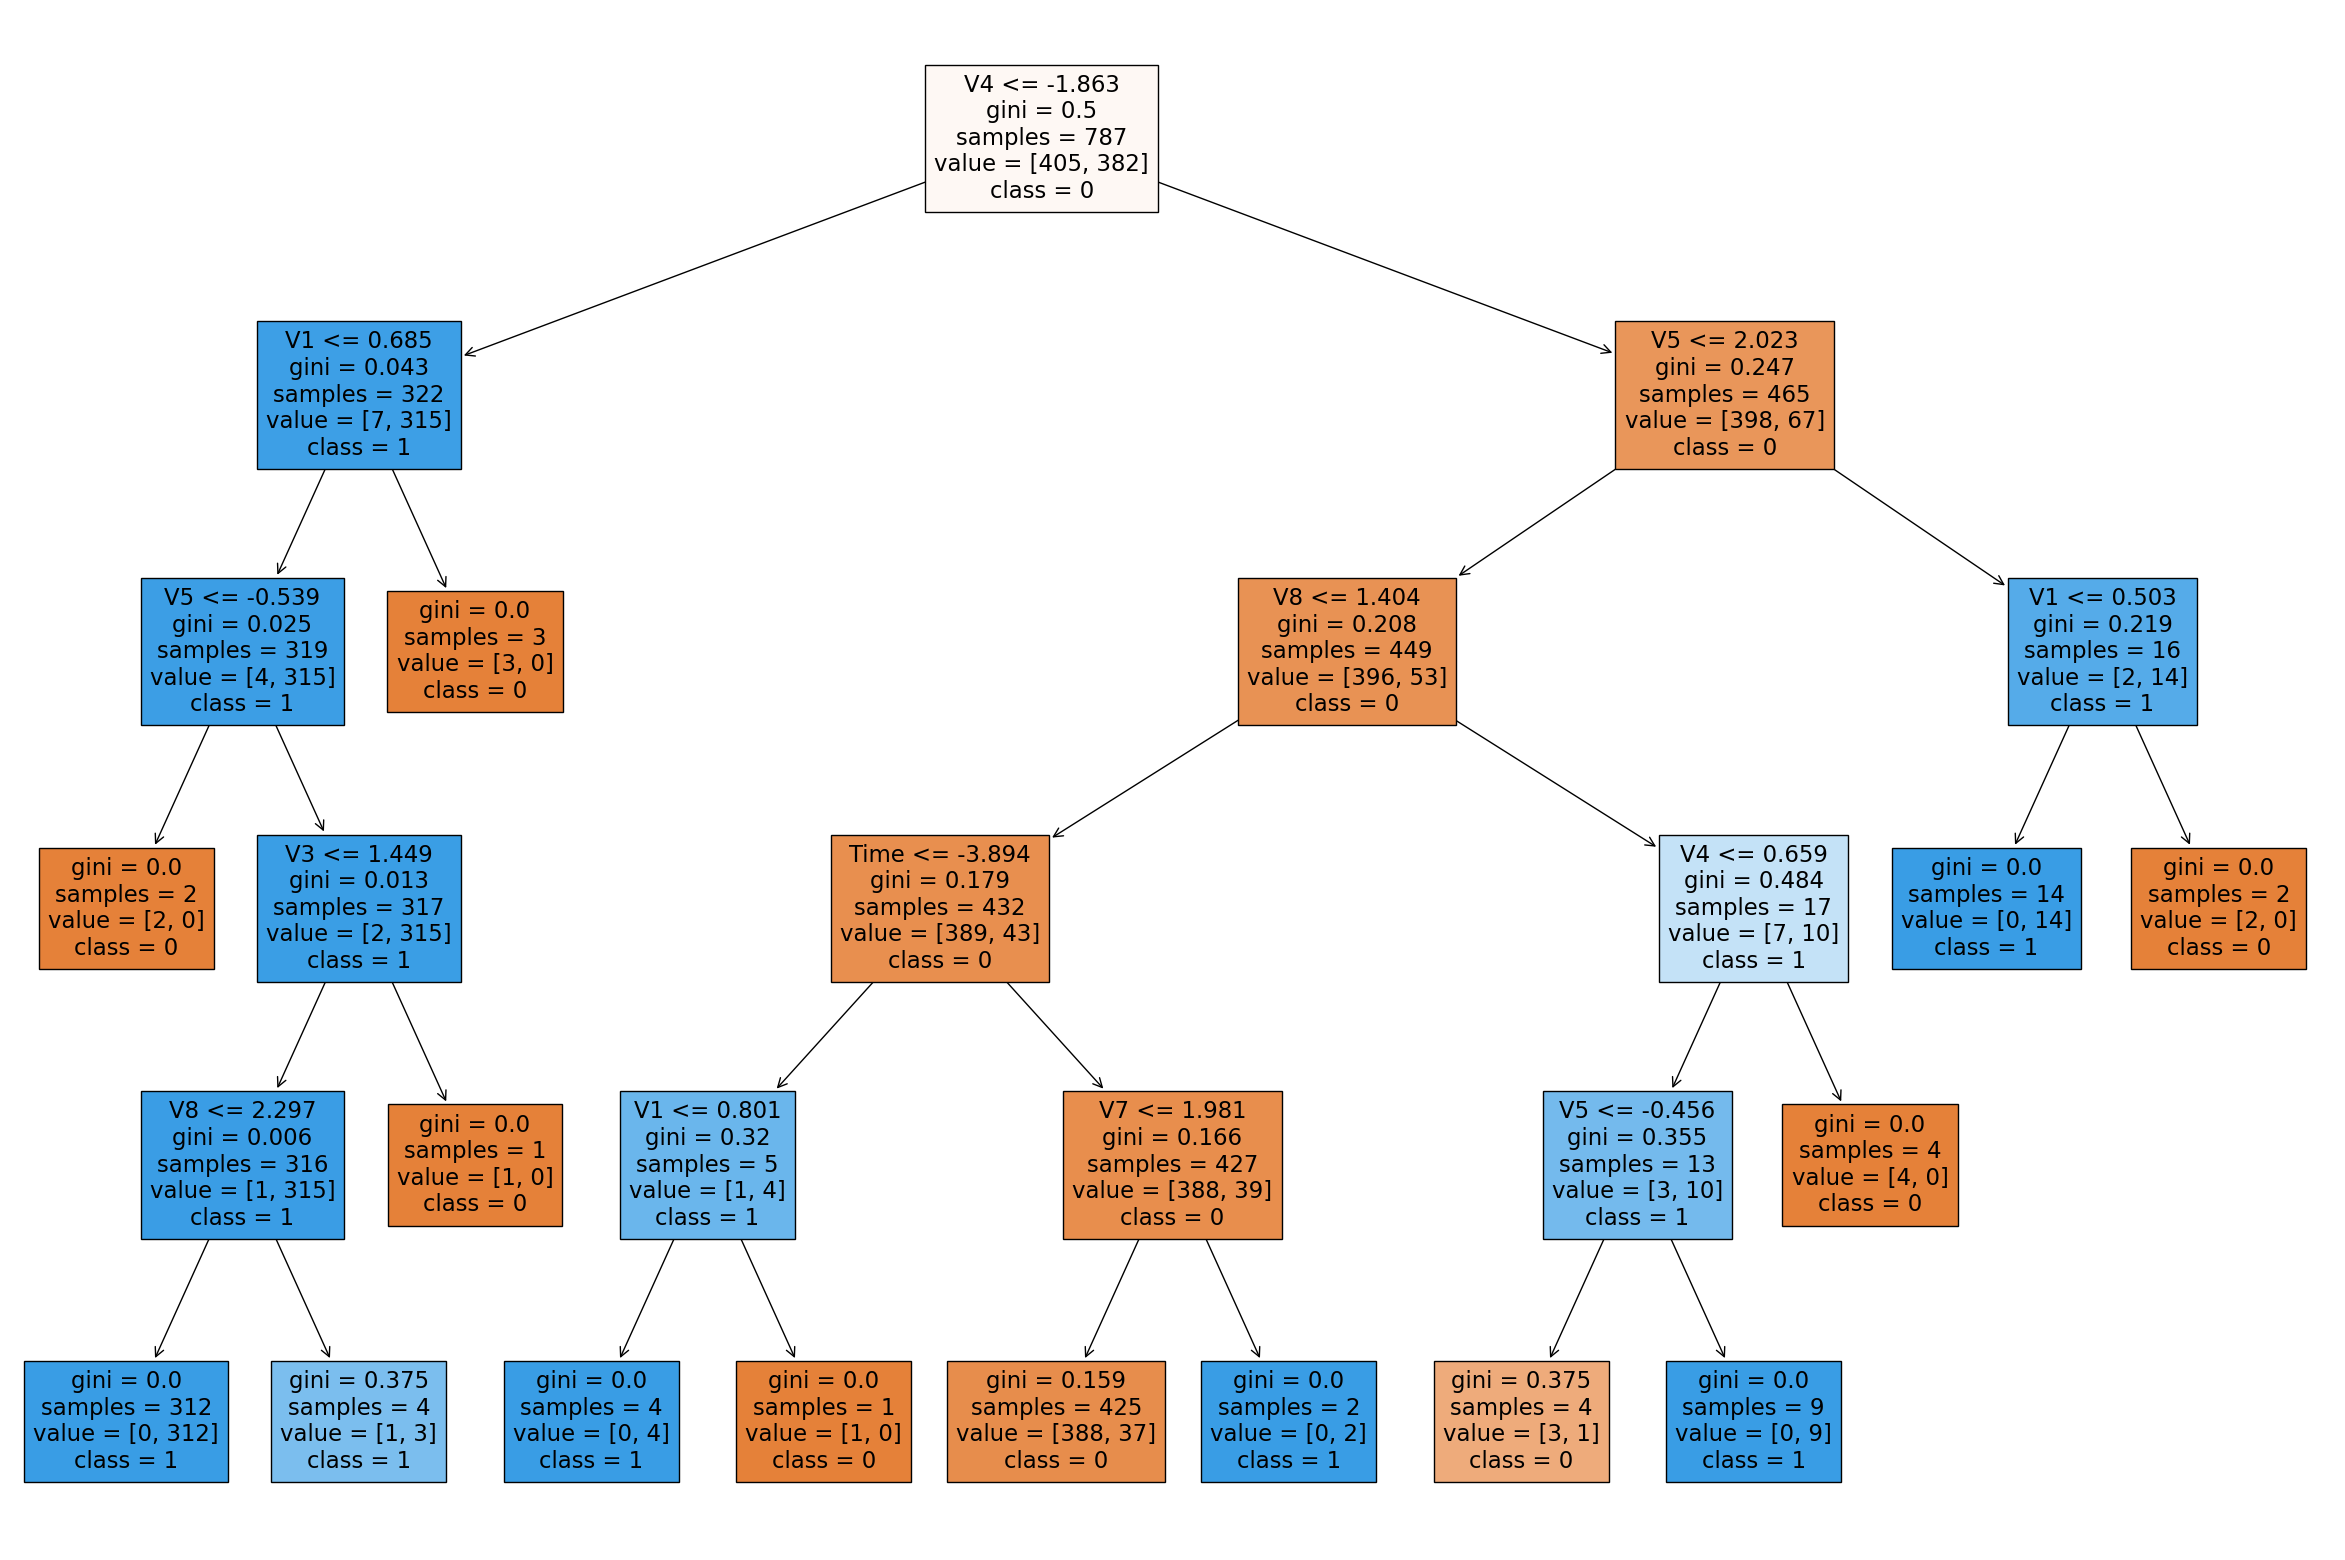

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()